In [1]:
# For statistics and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For addressing files and missing values.
import os
import missingno as msno
import janitor

# For linear models.
import statsmodels.api as sm
from utils import linmodules as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Preparing Dataset
### 1. Accessing files and quick exploration data analysis.

In [7]:
path = "../Datasets/renewable"
to_analyze = os.path.join(path, "modern-renewable-prod.csv")
os.listdir(path)

['share-electricity-wind.csv',
 'wind-share-energy.csv',
 'biofuel-production.csv',
 'installed-solar-PV-capacity.csv',
 'installed-geothermal-capacity.csv',
 'modern-renewable-prod.csv',
 'solar-share-energy.csv',
 'share-electricity-renewables.csv',
 'hydro-share-energy.csv',
 'share-electricity-hydro.csv',
 'renewable-share-energy.csv',
 'share-electricity-solar.csv',
 'solar-energy-consumption.csv',
 'modern-renewable-energy-consumption.csv',
 'hydropower-consumption.csv',
 'wind-generation.csv',
 'cumulative-installed-wind-energy-capacity-gigawatts.csv']

In [9]:
mprod_df = pd.read_csv(filepath_or_buffer=to_analyze, header=0, sep=",")
mprod_df.head() # Modern renewable energy production.

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [10]:
mprod_df.columns

Index(['Entity', 'Code', 'Year', 'Electricity from wind (TWh)',
       'Electricity from hydro (TWh)', 'Electricity from solar (TWh)',
       'Electricity from other renewables including bioenergy (TWh)'],
      dtype='object')

In [11]:
mprod_df.shape

(7995, 7)

In [12]:
mprod_df.dtypes

Entity                                                          object
Code                                                            object
Year                                                             int64
Electricity from wind (TWh)                                    float64
Electricity from hydro (TWh)                                   float64
Electricity from solar (TWh)                                   float64
Electricity from other renewables including bioenergy (TWh)    float64
dtype: object

In [13]:
mprod_df.describe()

,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Electricity from other renewables including bioenergy (TWh)
count,7995.000000,7994.000000,7994.000000,7995.000000,7989.000000
mean,1999.745466,11.135878,100.810761,4.011584,9.987586
std,15.497815,79.115512,354.595200,36.179362,46.165962
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.080000,0.000000,0.000000
50%,2004.000000,0.000000,2.820000,0.000000,0.010000
75%,2012.000000,0.020000,19.059250,0.010000,0.867000
max,2021.000000,1813.700000,4311.810000,1023.100000,749.990000


To handle with more easiness our following descriptive analysis, columns names are snake cased:

In [21]:
mprod_df = mprod_df.clean_names(case_type="snake")
mprod_df.head(2)

,entity,code,year,electricity_from_wind_t_wh_,electricity_from_hydro_t_wh_,electricity_from_solar_t_wh_,electricity_from_other_renewables_including_bioenergy_t_wh_
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0


### 2. Inspecting missing values.

In [22]:
mprod_df.isna().sum()

entity                                                           0
code                                                           957
year                                                             0
electricity_from_wind_t_wh_                                      1
electricity_from_hydro_t_wh_                                     1
electricity_from_solar_t_wh_                                     0
electricity_from_other_renewables_including_bioenergy_t_wh_      6
dtype: int64

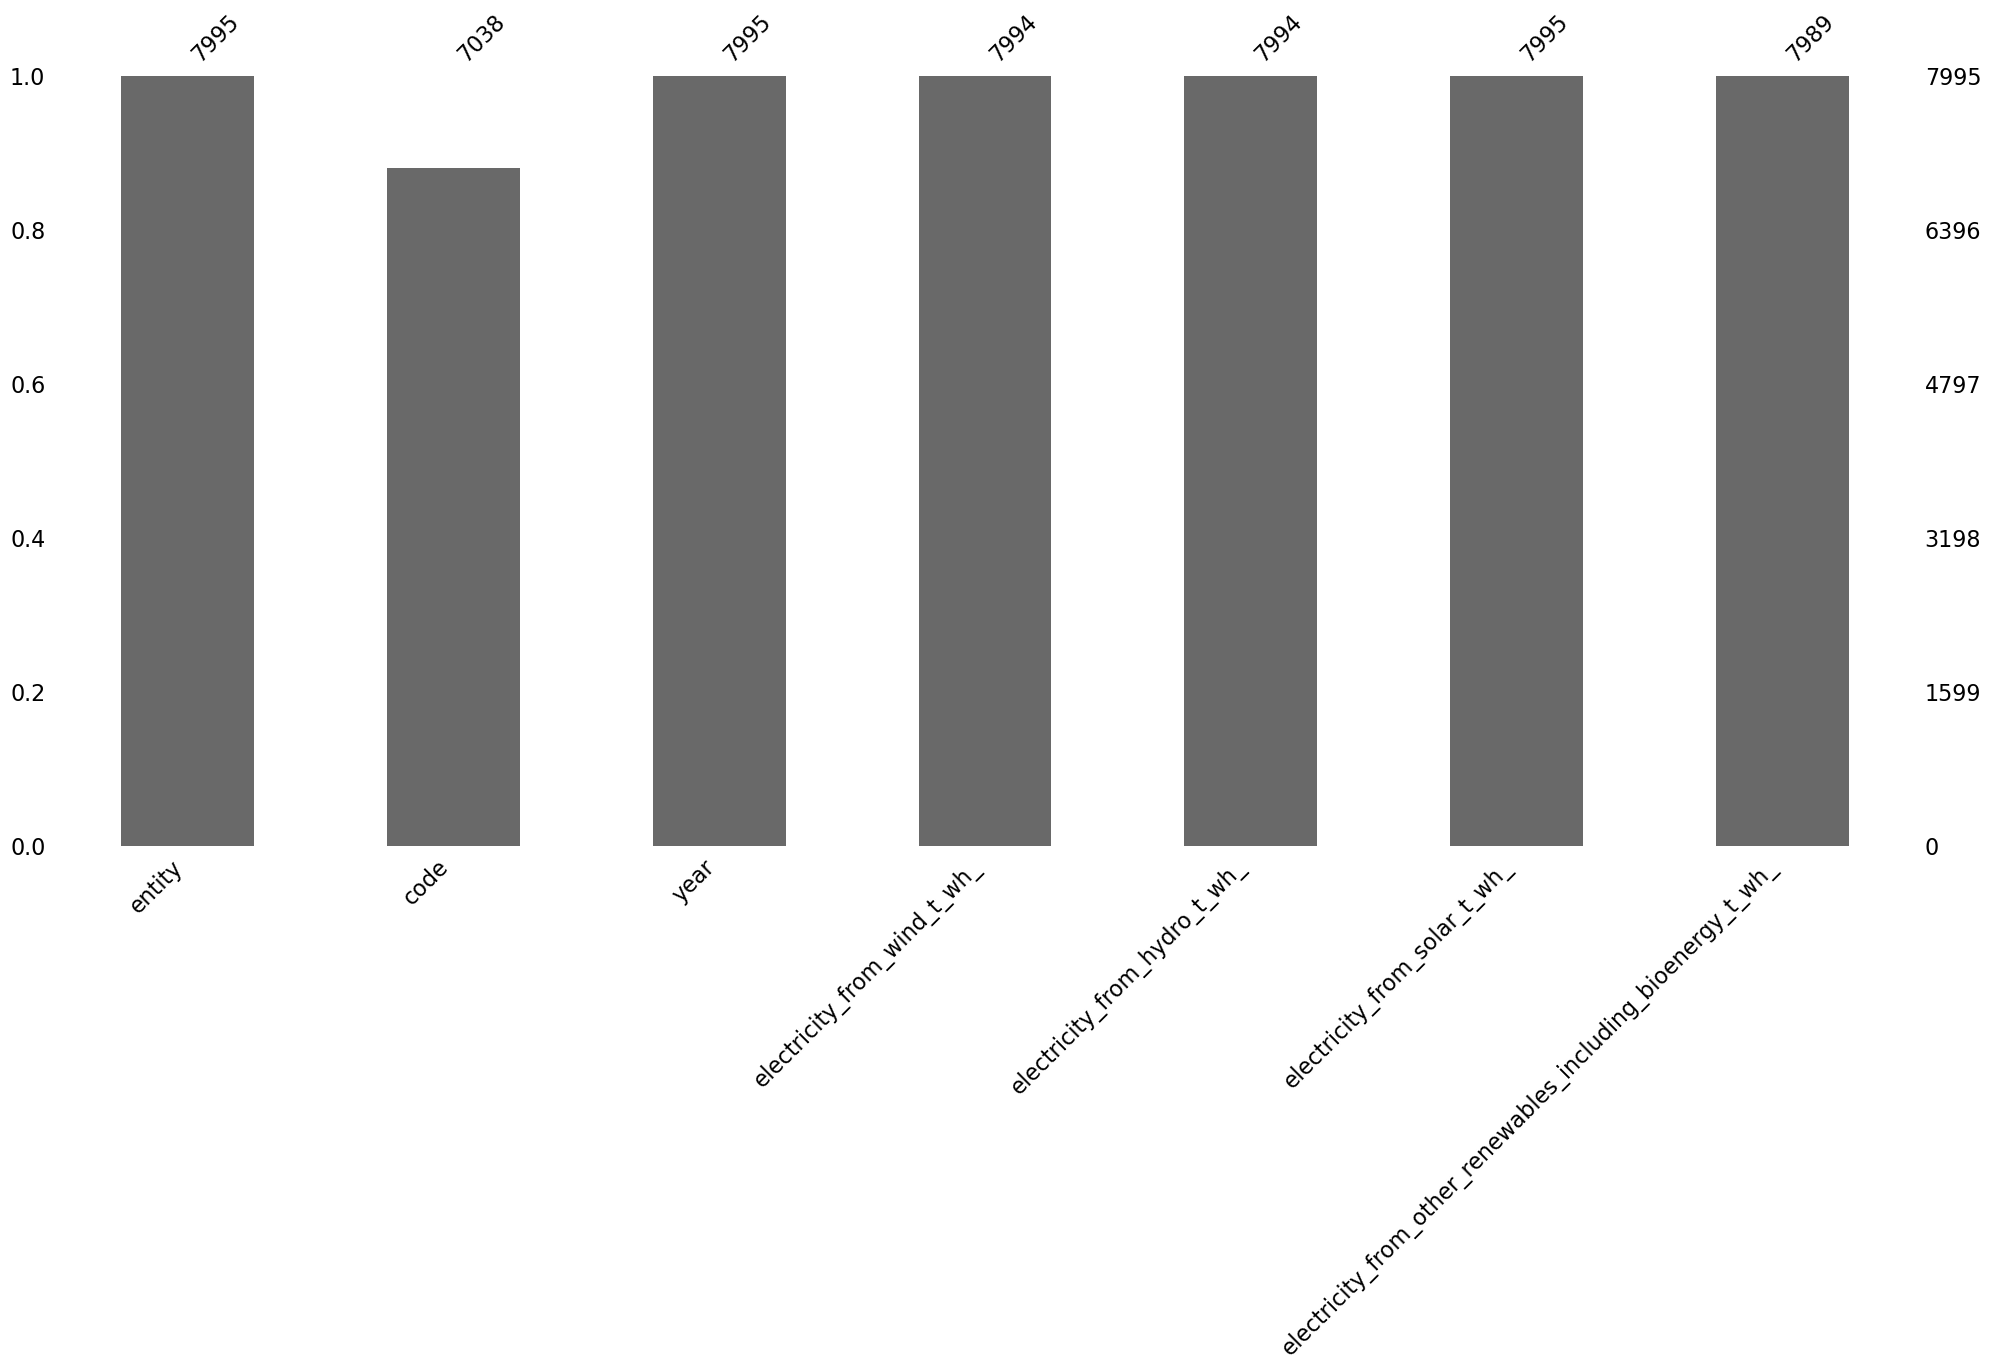

In [32]:
msno.bar(mprod_df);

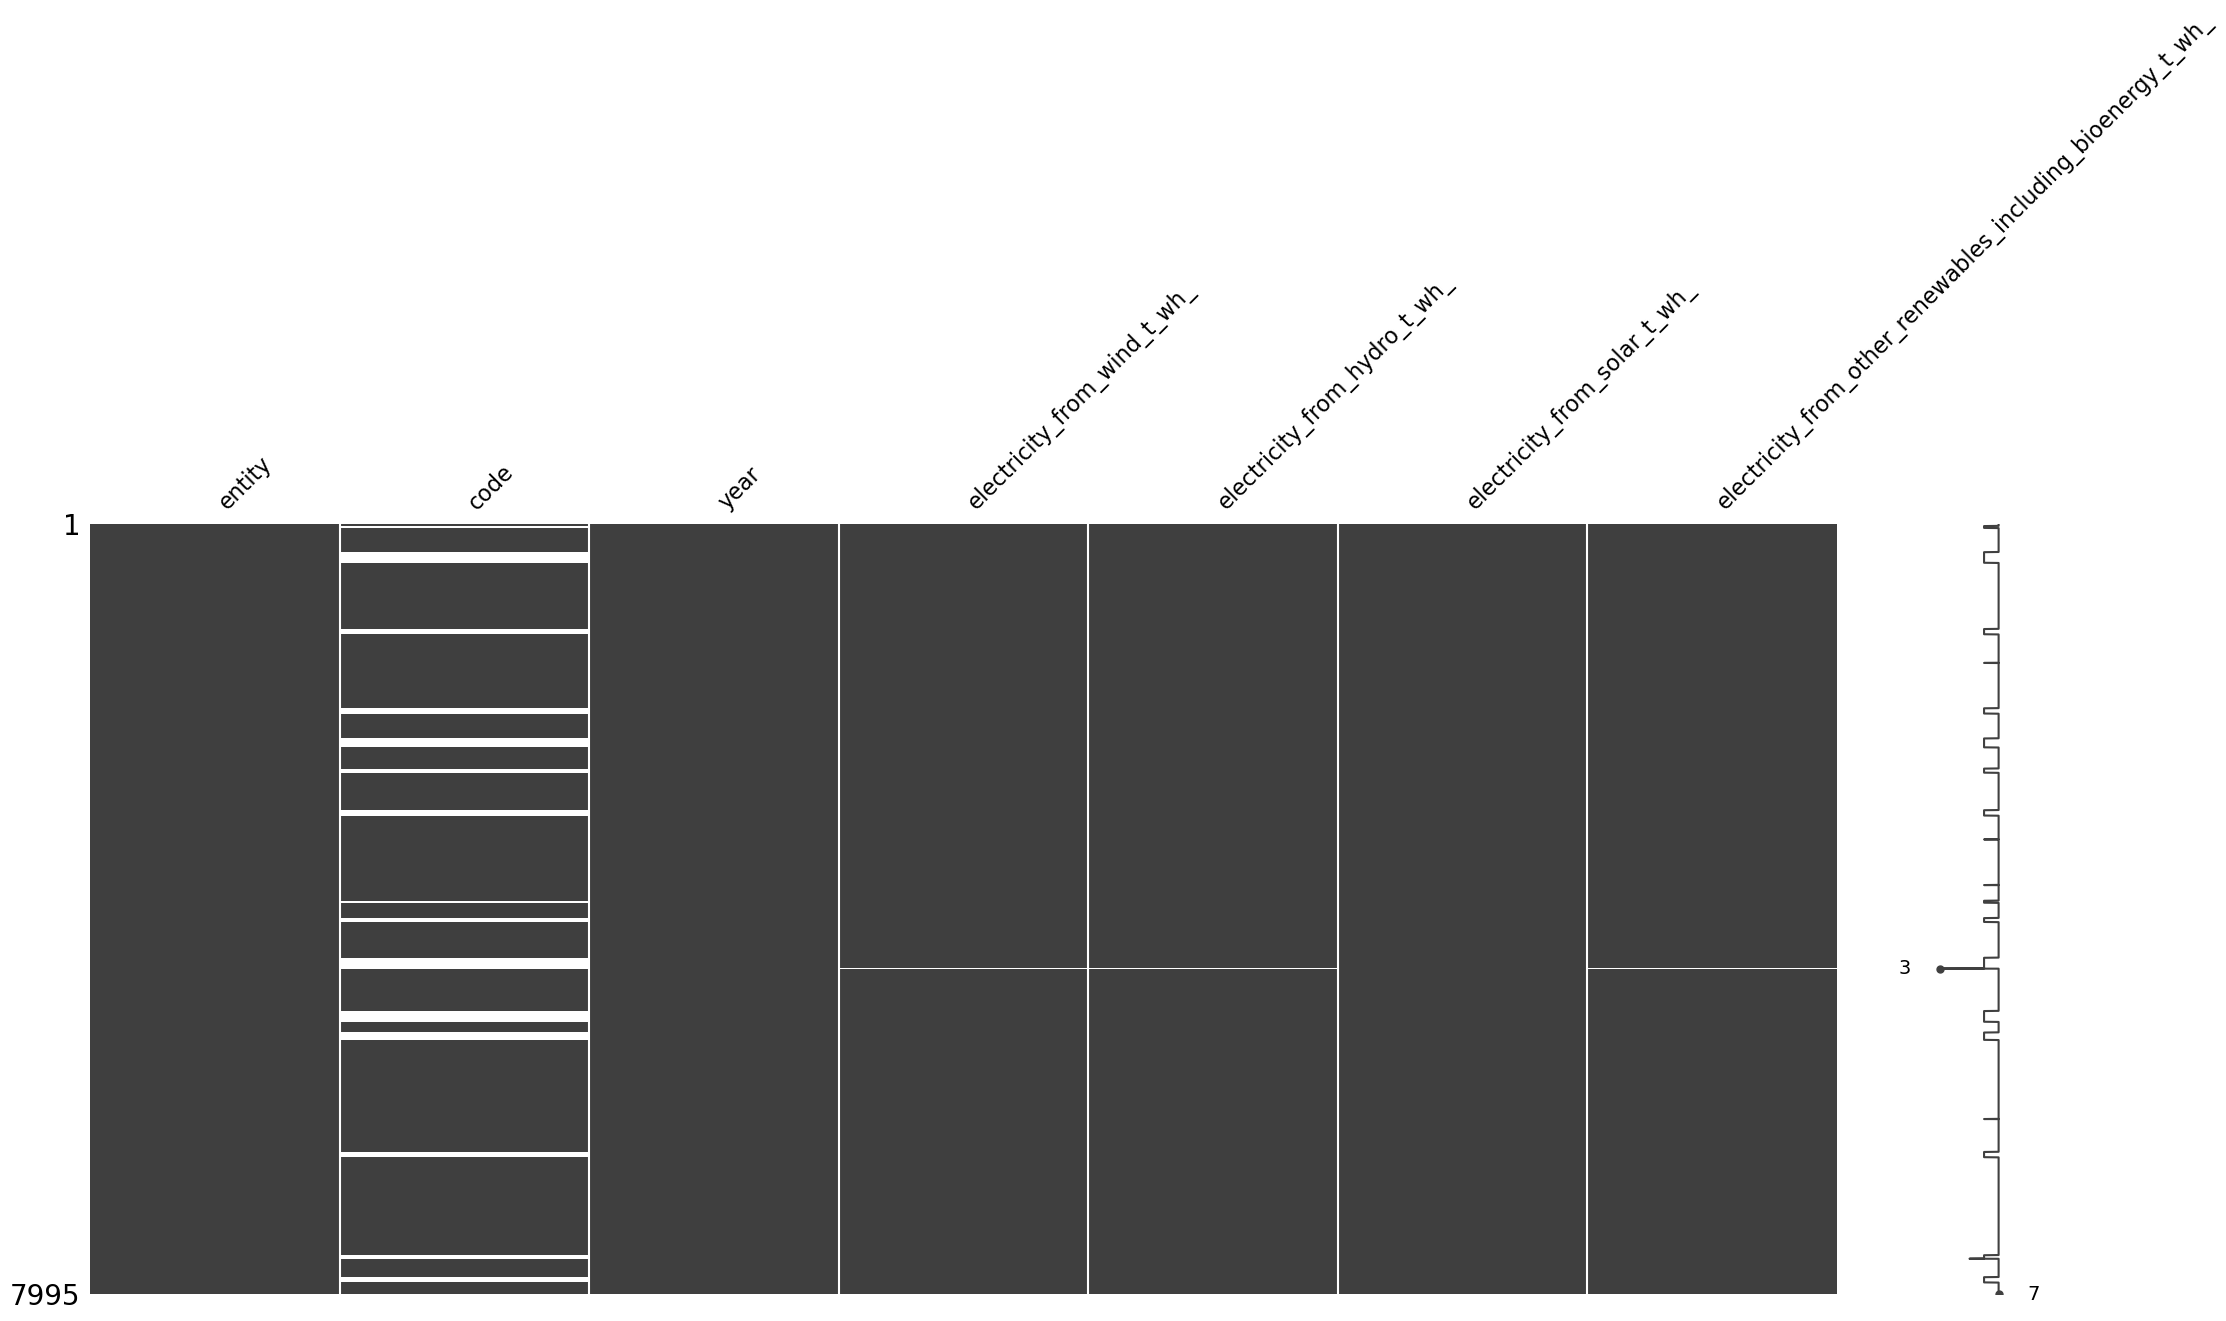

In [37]:
msno.matrix(mprod_df);

In [43]:
%run "./utils/pandas-missing-extension.ipynb"

### 3. Descriptive analysis using `seaborn`